# Second Assignment
__Course:__ Undergraduate Machine Learning Course

__Design and Develop:__ Mobin Nesari 99222107

Installing Requirements :

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler, normalize
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv('ECommerce_consumer behaviour.csv')
data_copy = data.copy()
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [3]:
data.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [5]:
data['department_id'].nunique()

21

In [6]:
data['product_id'].nunique()

134

In [7]:
data['user_id'].nunique()

105273

In [8]:
data.isna().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [9]:
data.fillna(0, inplace=True)

In [10]:
data['add_to_cart_order'].mean()

8.363173377978026

In [11]:
data['days_since_prior_order'].mean()

10.684989014613016

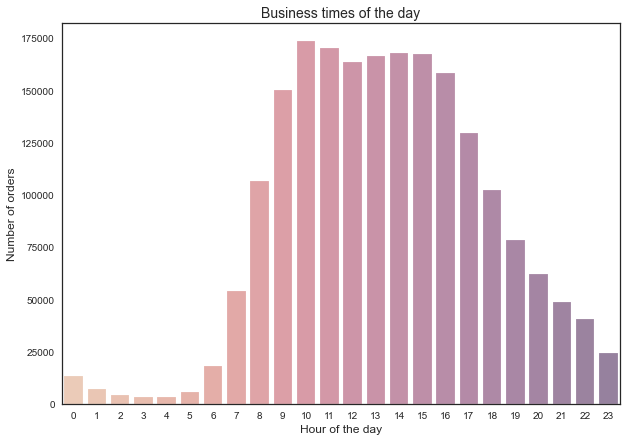

In [12]:
data['order_hour_of_day'].value_counts()

plt.figure(figsize =(10, 7))
sns.set_style('ticks')
sns.countplot(data=data, x=data['order_hour_of_day'], palette='flare', alpha=0.6)
plt.title("Business times of the day", fontsize=14)
plt.xlabel("Hour of the day", fontsize=12)
plt.ylabel("Number of orders", fontsize=12)
plt.show()

In [13]:
departments = data['department'].value_counts()
departments_df = pd.DataFrame(departments).reset_index()
departments_df.columns = ['Department', 'Order Count']
top_departments = departments_df.sort_values(by = 'Order Count', ascending = False).head()

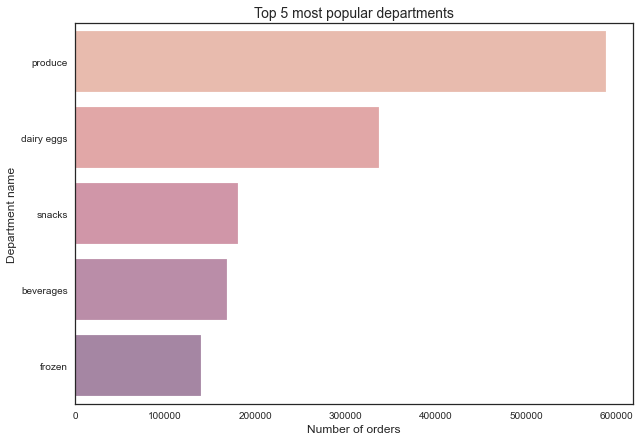

In [14]:
plt.figure(figsize=(10, 7))
sns.set_style('ticks')
sns.barplot(data=top_departments, x="Order Count", y="Department", palette="flare", alpha=0.6)
plt.title("Top 5 most popular departments", fontsize=14)
plt.xlabel("Number of orders", fontsize=12)
plt.ylabel("Department name", fontsize=12)
plt.show()

In [15]:
products = data['product_name'].value_counts()
products_df = pd.DataFrame(products).reset_index()
products_df.columns = ["Product", "Order Count"]
top_products = products_df.sort_values(by = "Order Count", ascending = False).head()

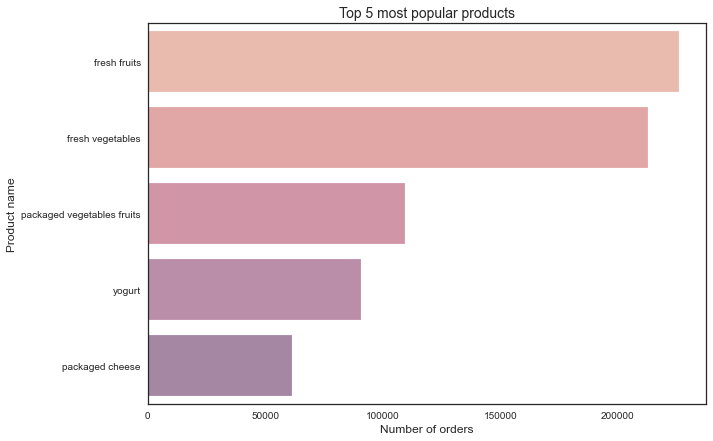

In [16]:
plt.figure(figsize=(10, 7))
sns.set_style('ticks')
sns.barplot(data=top_products, x="Order Count", y="Product", palette="flare", alpha=0.6)
plt.title("Top 5 most popular products", fontsize=14)
plt.xlabel("Number of orders", fontsize=12)
plt.ylabel("Product name", fontsize=12)
plt.show()

In [17]:
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,0.0,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,0.0,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,0.0,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,0.0,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,0.0,83,5,0,4,produce,fresh vegetables


In [18]:
product_dept_df = pd.crosstab(data['department'], data['product_name'])
product_dept_df.head()

product_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
department,,,,,,,,,,,,,,,,,,,,,
alcohol,0,0,0,0,0,0,0,0,0,3002,...,0,0,0,0,0,0,0,0,1893,0
babies,0,0,504,515,23355,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bakery,0,0,0,0,0,2214,0,0,0,0,...,0,0,0,12082,0,0,0,0,0,0
beverages,0,0,0,0,0,0,0,0,0,0,...,0,15733,0,0,0,0,0,52564,0,0
breakfast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
product_dept_df.idxmax(axis=1).to_frame(name="Most Popular Item")

,Most Popular Item
department,
alcohol,beers coolers
babies,baby food formula
bakery,bread
beverages,water seltzer sparkling water
breakfast,cereal
bulk,bulk grains rice dried goods
canned goods,soup broth bouillon
dairy eggs,yogurt
deli,lunch meat


In [20]:
product_reordered_df = data.groupby('product_name')['reordered'].count().reset_index().sort_values(by='reordered', ascending=False)
product_reordered_df

,product_name,reordered
50,fresh fruits,226039
53,fresh vegetables,212611
98,packaged vegetables fruits,109596
133,yogurt,90751
93,packaged cheese,61502
...,...,...
76,kitchen supplies,561
3,baby bath body care,515
2,baby accessories,504
8,beauty,387


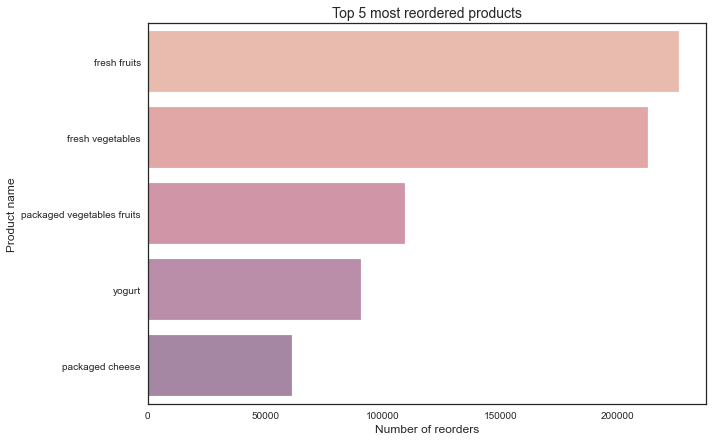

In [21]:
plt.figure(figsize = (10,7))
sns.set_style("ticks")
sns.barplot(data=product_reordered_df.head(5), x="reordered", y="product_name", palette = 'flare', alpha=0.6)
plt.title("Top 5 most reordered products", fontsize=14)
plt.xlabel("Number of reorders", fontsize=12)
plt.ylabel("Product name", fontsize=12)
plt.show()

In [22]:
data_departments = data['department']

data.drop(['order_id', 'user_id', 'order_number', 'product_id', 'department_id', 'department'], axis = 1, inplace=True)

In [23]:
data.head()

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_name
0,2,18,0.0,1,0,baking ingredients
1,2,18,0.0,2,0,soy lactosefree
2,2,18,0.0,3,0,butter
3,2,18,0.0,4,0,fresh vegetables
4,2,18,0.0,5,0,fresh vegetables


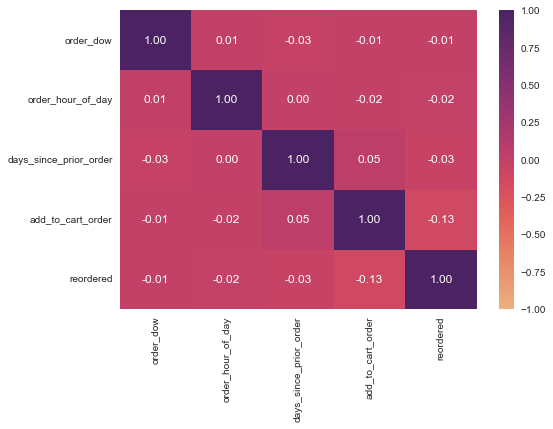

In [24]:
sns.heatmap(data.iloc[:, :-1].corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='flare',
            fmt='.2f')
plt.show()

In [25]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-1])
data_scaled

array([[-0.35119813,  1.07533889, -1.1727311 , -1.02980615, -1.19895571],
       [-0.35119813,  1.07533889, -1.1727311 , -0.88994714, -1.19895571],
       [-0.35119813,  1.07533889, -1.1727311 , -0.75008813, -1.19895571],
       ...,
       [-0.35119813,  1.31113193, -0.84346606, -0.88994714,  0.83405917],
       [-0.35119813,  1.31113193, -0.84346606, -0.75008813,  0.83405917],
       [-0.35119813,  1.31113193, -0.84346606, -0.61022912,  0.83405917]])

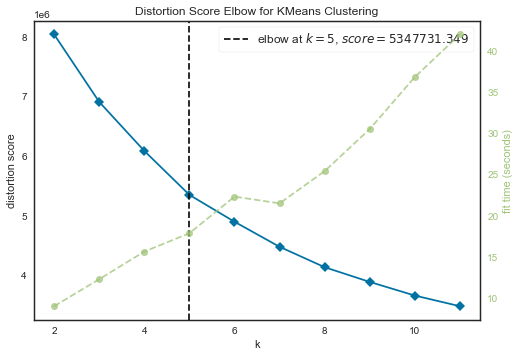

In [26]:
model = KMeans(n_init=20)
visualiser = KElbowVisualizer(model, k=(2,12))
visualiser.fit(data_scaled)        
visualiser.show();

In [27]:
kmeans_mod = KMeans(n_clusters=5, n_init=20)
kmeans_mod.fit(data_scaled)

KMeans(n_clusters=5, n_init=20)

In [28]:
data['cluster'] = kmeans_mod.labels_
data.head()

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_name,cluster
0,2,18,0.0,1,0,baking ingredients,0
1,2,18,0.0,2,0,soy lactosefree,0
2,2,18,0.0,3,0,butter,0
3,2,18,0.0,4,0,fresh vegetables,0
4,2,18,0.0,5,0,fresh vegetables,0


In [29]:
data['cluster'].value_counts()

0    544787
3    484077
1    477475
2    323229
4    189933
Name: cluster, dtype: int64

In [30]:
data_with_dept = pd.concat([data, data_departments], axis = 1)
data_with_dept.head()

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_name,cluster,department
0,2,18,0.0,1,0,baking ingredients,0,pantry
1,2,18,0.0,2,0,soy lactosefree,0,dairy eggs
2,2,18,0.0,3,0,butter,0,dairy eggs
3,2,18,0.0,4,0,fresh vegetables,0,produce
4,2,18,0.0,5,0,fresh vegetables,0,produce


In [31]:
data.head()

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_name,cluster
0,2,18,0.0,1,0,baking ingredients,0
1,2,18,0.0,2,0,soy lactosefree,0
2,2,18,0.0,3,0,butter,0
3,2,18,0.0,4,0,fresh vegetables,0
4,2,18,0.0,5,0,fresh vegetables,0


In [32]:
pca_mod = PCA(n_components=5)
pca_mod.fit(data.iloc[:, :-2])

PCA(n_components=5)

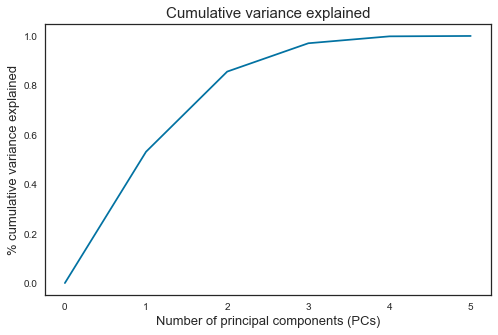

In [33]:
exp_variance = np.insert(pca_mod.explained_variance_ratio_, 0, 0)

figure = plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(exp_variance))
plt.xticks(range(0, 6))
plt.xlabel("Number of principal components (PCs)", size=13)
plt.ylabel("% cumulative variance explained", size=13)
plt.title("Cumulative variance explained", size=15)

plt.show()

In [34]:
pca_mod = PCA(n_components=3)

data_pca = pd.DataFrame(data=pca_mod.fit_transform(data_scaled),
                        columns=['PC1', 'PC2', 'PC3'])

# view data frame of PCs
data_pca.head()

,PC1,PC2,PC3
0,-0.278378,-0.999085,-0.730310
1,-0.184500,-1.003332,-0.703474
2,-0.090622,-1.007578,-0.676637
3,0.003255,-1.011824,-0.649800
4,0.097133,-1.016071,-0.622963


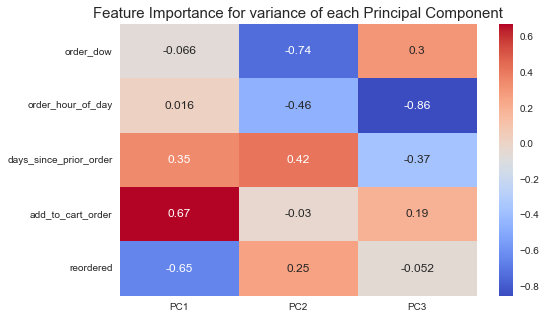

In [35]:
figure = plt.figure(figsize=(8, 5))

sns.heatmap(pd.DataFrame(pca_mod.components_).transpose(),
            annot=True,
            xticklabels=['PC1', 'PC2', 'PC3'],
            yticklabels=data.iloc[:,:-2].columns,
            cmap='coolwarm')

plt.title('Feature Importance for variance of each Principal Component', fontsize=15)
plt.show()

In [36]:
data.reset_index(drop=True, inplace=True)
data_pca.reset_index(drop=True, inplace=True)
plot_data = pd.concat([data_pca, data['cluster']], axis=1)

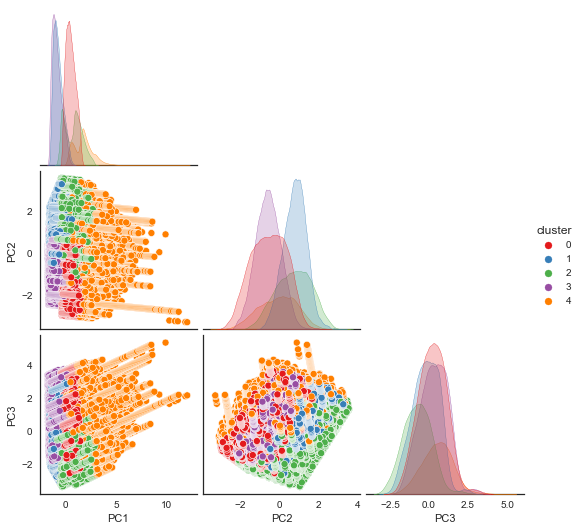

In [37]:
sns.pairplot(data=plot_data,
             hue='cluster',
             palette='Set1', 
             corner=True);

In [39]:
tsne_mod = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3)

x_embeded = tsne_mod.fit_transform(data_scaled)
data_tsne = pd.DataFrame(data=x_embeded.fit_transform(data_scaled),
                        columns=['C1', 'C2', 'C3'])